NAME: MITALI JAIN

ROLL NO: 102017113

SUBGROUP: 3CS5

NLP LAB ASSIGNMENT 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the document-term matrix
#(created from transcripts of 10 movies)
import pandas as pd

data=pd.read_pickle('/content/drive/MyDrive/NLP_Assignment/pickle/dtm.pkl').transpose()
data.head()

,Black Panther 2,Black Widow,Conjuring 3,Doctor Strange 2,Knives Out,Minions 2,Puss In Boots 2,Shershaah,The Boss Baby,the Devil All the Time
aa,0,0,0,0,0,0,0,0,1,0
aah,0,0,0,0,0,2,4,0,8,0
aahing,0,0,0,0,0,0,1,0,0,0
aarif,0,0,0,0,0,0,0,2,0,0
aarp,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Find the top 150 words used in each movie
top_dict={}
for c in data.columns:
  top=data[c].sort_values(ascending=False).head(100)
  top_dict[c]=list(zip(top.index, top.values))
top_dict

{'Black Panther 2': [('wakanda', 53),
  ('im', 45),
  ('princess', 42),
  ('just', 41),
  ('mother', 39),
  ('right', 37),
  ('yes', 34),
  ('like', 33),
  ('shuri', 33),
  ('need', 32),
  ('dont', 31),
  ('queen', 30),
  ('did', 29),
  ('come', 28),
  ('got', 26),
  ('tchalla', 26),
  ('vibranium', 23),
  ('think', 23),
  ('panther', 22),
  ('people', 21),
  ('black', 21),
  ('know', 21),
  ('world', 20),
  ('good', 20),
  ('hey', 20),
  ('brother', 19),
  ('youre', 19),
  ('took', 18),
  ('yeah', 18),
  ('namor', 18),
  ('okay', 17),
  ('child', 16),
  ('let', 16),
  ('scientist', 16),
  ('time', 16),
  ('help', 16),
  ('griot', 16),
  ('going', 16),
  ('oh', 16),
  ('war', 16),
  ('way', 15),
  ('work', 14),
  ('shit', 14),
  ('water', 13),
  ('kill', 13),
  ('talokan', 13),
  ('want', 13),
  ('ancestors', 13),
  ('thats', 13),
  ('king', 13),
  ('does', 13),
  ('thought', 12),
  ('man', 12),
  ('home', 12),
  ('herb', 12),
  ('general', 12),
  ('gone', 12),
  ('nation', 12),
  ('lo

In [ ]:
#top 50 words in each movie
for movie, top_words in top_dict.items():
  print(movie)
  print(', '.join([word for word,count in top_words[0:50]]))
  print('---')

Black Panther 2
wakanda, im, princess, just, mother, right, yes, like, shuri, need, dont, queen, did, come, got, tchalla, vibranium, think, panther, people, black, know, world, good, hey, brother, youre, took, yeah, namor, okay, child, let, scientist, time, help, griot, going, oh, war, way, work, shit, water, kill, talokan, want, ancestors, thats, king
---
Black Widow
dont, natasha, im, know, okay, youre, yelena, oh, melina, alexei, like, just, grunts, come, russian, grunting, dreykov, gonna, yeah, want, english, did, got, speaking, need, right, huh, think, red, panting, day, time, young, good, didnt, yes, going, room, thats, really, say, make, tell, groans, chuckles, girls, look, shouting, ive, wait
---
Conjuring 3
arne, ed, okay, dont, david, know, just, lorraine, im, oh, youre, come, right, got, father, yeah, like, stop, god, think, help, look, need, going, gonna, let, lord, hey, bruno, did, leave, thy, theres, yes, hes, thats, tell, curse, want, time, didnt, weve, way, ill, shes, s

In [ ]:
#creating a stop words list
from collections import Counter
#pulling out the top 50 words in each movie
words=[]
for movie in data.columns:
  top= [word for (word,count) in top_dict[movie]]
  for t in top:
    words.append(t)
words

In [ ]:
#identify the most common words along with how many movies they occur in
Counter(words).most_common()

[('im', 10),
 ('just', 10),
 ('right', 10),
 ('yes', 10),
 ('like', 10),
 ('dont', 10),
 ('did', 10),
 ('come', 10),
 ('got', 10),
 ('know', 10),
 ('hey', 10),
 ('youre', 10),
 ('yeah', 10),
 ('okay', 10),
 ('time', 10),
 ('oh', 10),
 ('want', 10),
 ('look', 10),
 ('need', 9),
 ('think', 9),
 ('good', 9),
 ('thats', 9),
 ('gonna', 9),
 ('ill', 9),
 ('going', 8),
 ('home', 8),
 ('say', 8),
 ('make', 8),
 ('little', 8),
 ('stop', 8),
 ('help', 7),
 ('way', 7),
 ('man', 7),
 ('hes', 7),
 ('tell', 7),
 ('wait', 7),
 ('didnt', 7),
 ('sorry', 7),
 ('people', 6),
 ('let', 6),
 ('whats', 6),
 ('mean', 6),
 ('love', 6),
 ('uh', 6),
 ('thank', 6),
 ('shes', 5),
 ('life', 5),
 ('sure', 5),
 ('son', 5),
 ('really', 5),
 ('ive', 5),
 ('sighs', 5),
 ('thing', 5),
 ('theres', 5),
 ('world', 4),
 ('thought', 4),
 ('lets', 4),
 ('god', 4),
 ('said', 4),
 ('doing', 4),
 ('away', 4),
 ('grunts', 4),
 ('grunting', 4),
 ('huh', 4),
 ('groans', 4),
 ('chuckles', 4),
 ('gasps', 4),
 ('mom', 4),
 ('talk', 4),

In [ ]:
# If more than half of the movies have it as a top word, exclude it from the list
add_stop_words = [word for word,count in Counter(words).most_common() if count>=6]
add_stop_words

In [ ]:
#update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pickle
#read in cleaned data
data_clean=pd.read_pickle('/content/drive/MyDrive/NLP_Assignment/pickle/data_clean.pkl')
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)

#recreate dtm
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

#pickle for later
pickle.dump(cv, open('/content/drive/MyDrive/NLP_Assignment/pickle/cv_stop.pkl', 'wb'))
data_stop.to_pickle('/content/drive/MyDrive/NLP_Assignment/pickle/dtm_stop.pkl')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# MAKING WORD CLOUDS
# !pip install wordcloud
from wordcloud import WordCloud

wc=WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2',
             max_font_size=150, random_state=42)

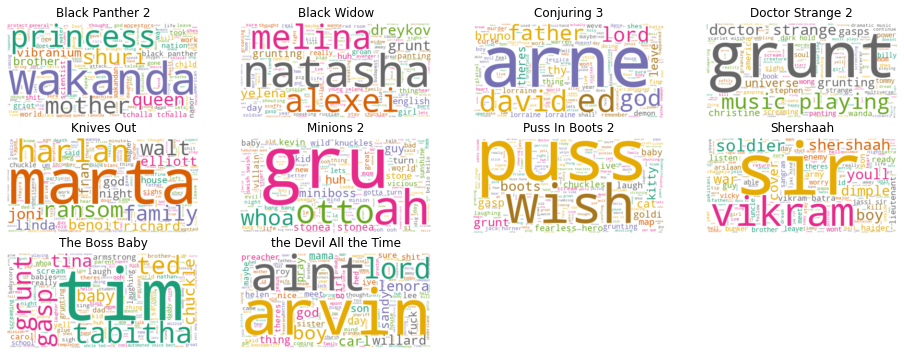

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]

#create subplots for each movie
for index,movie in enumerate(data.columns):
  wc.generate(data_clean.transcript[movie])

  plt.subplot(3,4,index+1)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title(movie)

plt.show()

Movies 'Conjuring 3' and 'The Devil All the Time' use words like 'God', 'Lord', 'Father'

Black Panther has words like 'Princess', 'Queen', 'nation'

In [ ]:
# Find the number of unique words in each movie

# Identify non zero items in dtm
unique_list=[]
for movie in data.columns:
  uniques=data[movie].to_numpy().nonzero()[0].size
  unique_list.append(uniques)

# create new df that contains this unique word count
data_words=pd.DataFrame(list(zip(data.columns, unique_list)), columns=['movie', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,movie,unique_words
5,Minions 2,1003
2,Conjuring 3,1057
3,Doctor Strange 2,1395
1,Black Widow,1563
0,Black Panther 2,1620
6,Puss In Boots 2,1641
7,Shershaah,1653
9,the Devil All the Time,1772
8,The Boss Baby,2018
4,Knives Out,3015


In [ ]:
# Calculating words per minute in each movie

# total number of words in each movie
total_list=[]
for movie in data.columns:
  totals=sum(data[movie])
  total_list.append(totals)

# run-times for each movie from wikipedia, in minutes
run_times=[161, 133, 112, 126, 130, 90, 100, 135, 107, 138]
data_words['total_words']=total_list
data_words['run_times']=run_times
data_words['words_per_minute']=data_words['total_words']/data_words['run_times']

# Sort the dataframe by words per minute
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,movie,unique_words,total_words,run_times,words_per_minute
2,Conjuring 3,1057,2747,112,24.526786
0,Black Panther 2,1620,4228,161,26.260870
1,Black Widow,1563,4416,133,33.203008
5,Minions 2,1003,3012,90,33.466667
3,Doctor Strange 2,1395,4392,126,34.857143
9,the Devil All the Time,1772,5273,138,38.210145
7,Shershaah,1653,5277,135,39.088889
6,Puss In Boots 2,1641,5636,100,56.360000
4,Knives Out,3015,7834,130,60.261538
8,The Boss Baby,2018,7701,107,71.971963


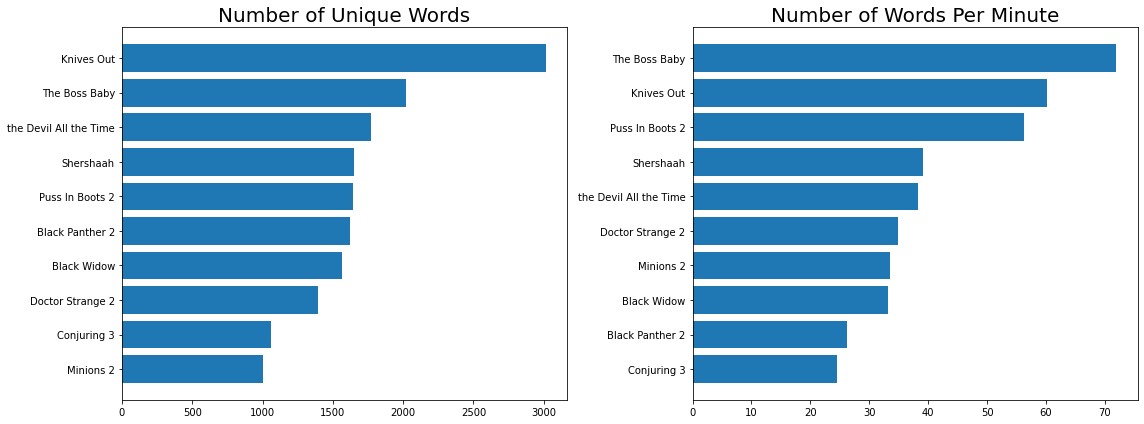

In [ ]:
# plot findings
import numpy as np
y_pos = np.arange(len(data_words))
plt.subplot(1,2,1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.movie)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1,2,2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.movie)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

**Vocabulary**

Knives Out uses the most amount of unique words, followed by The Boss baby

Minions and Conjuring 3 have the smallest vocabulary out of the selected movies


**Speed**

The Boss Baby has the highest speed of average of 70 words per minute

Conjuring 3 and Black Panther 2 are slow with average speed around 25 words per minute

In [ ]:
# Profanity

# isolate the bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity=pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns=['f_word', 's_word']
data_profanity

,f_word,s_word
Black Panther 2,0,14
Black Widow,0,5
Conjuring 3,0,1
Doctor Strange 2,0,4
Knives Out,2,24
Minions 2,0,0
Puss In Boots 2,0,0
Shershaah,1,1
The Boss Baby,0,0
the Devil All the Time,23,17


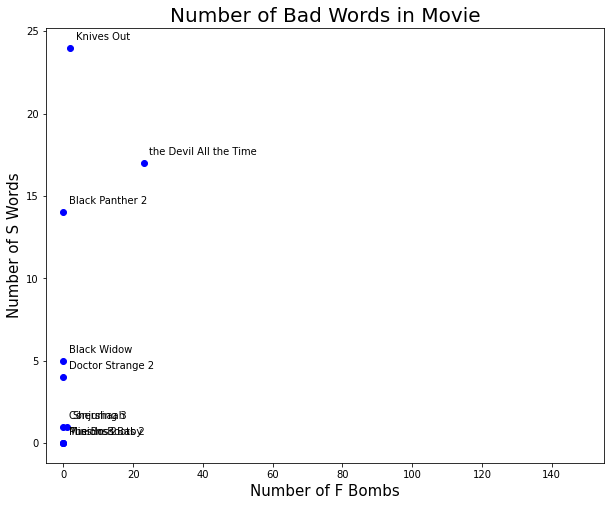

In [ ]:
# create a scatter plot of our findings

plt.rcParams['figure.figsize'] = [10, 8]
for i, movie in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[movie]
    y = data_profanity.s_word.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, movie, fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words in Movie', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

Knives Out and The Devil All The Time have a lot of swearing, and likely aren't suited for younger audiences

Minions 2, The Boss Baby, Puss in Boots 2, donot contain any swear words, and are likely family-friendly

ADDITIONAL EXERCISES

In [ ]:
# What other word counts do you think would be interesting to compare
# instead of the f-word and s-word? Create a scatter plot comparing them.

# we can check if the movies are horror
# by checking for words like ghost, demon, devil, spirit, etc

# we can also check if the movies are violent
# by checking for words like kill, murder, slap, kick, punch, shot
data_scary_words = data.transpose()[['ghost', 'devil', 'demon', 'spirit', 'exorcism']]
data_violent_words=data.transpose()[['kill', 'murder', 'shot', 'slap', 'punch', 'kick']]
data_adult = pd.concat([data_scary_words.ghost+data_scary_words.devil
                         +data_scary_words.demon + data_scary_words.spirit
                         + data_scary_words.exorcism,
                        data_violent_words.kill+data_violent_words.murder
                        +data_violent_words.shot+data_violent_words.slap
                        +data_violent_words.punch+data_violent_words.kick], axis=1)
data_adult.columns = ['scary_words', 'violent_words']
data_adult

,scary_words,violent_words
Black Panther 2,4,13
Black Widow,5,12
Conjuring 3,17,9
Doctor Strange 2,6,12
Knives Out,0,16
Minions 2,1,5
Puss In Boots 2,3,4
Shershaah,4,23
The Boss Baby,2,1
the Devil All the Time,11,14


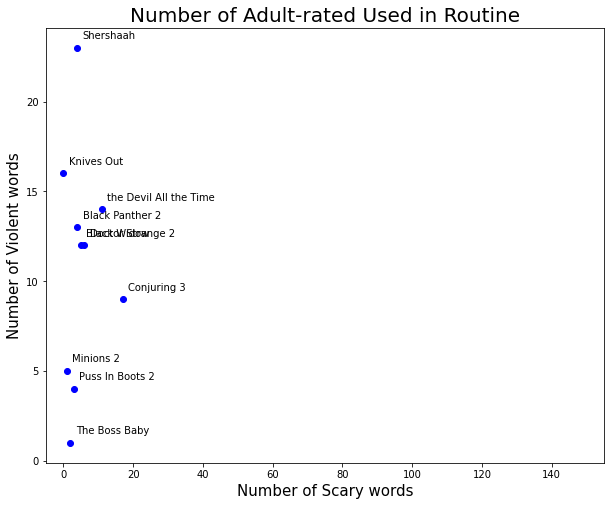

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, movie in enumerate(data_adult.index):
    x = data_adult.scary_words.loc[movie]
    y = data_adult.violent_words.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, movie, fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Adult-rated Used in Routine', fontsize=20)
plt.xlabel('Number of Scary words', fontsize=15)
plt.ylabel('Number of Violent words', fontsize=15)

plt.show()